## Описание проекта

F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. На основе двух таблиц полученных ранее необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить данные по количеству рейсов на каждой модели самолёта с вылетом в сентябре 2018 года и среднеее количество рейсов, прибывающих в различные города, за день в августе 2018 года.



<a id='шаг1'></a>

## Шаг 1. Открытие файлов и изучение информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
df1 = pd.read_csv('/datasets/query_1.csv')
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
df2 = pd.read_csv('/datasets/query_3.csv')
df2.head(20)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
df2.duplicated().sum()

0

**Вывод**

Перед нами 2 таблицы.

В первой таблице находится информация о моделях самолетов и количестве рейсов в сентябре 2018 года. Пропусков и дубликатов нет, типы данных корректны:
* model — модели самолета (object)
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года (int)
 
 
Во второй таблице представленны данные о городах и количестве рейсов прибывших в город за день в агусте 2018 года. Таблица содержит 101 строку, так же отсутствуют дубликаты и пропуски. Типы данных корректны:
* city — городах (object)
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года (float)

## Шаг 2. Анализ данных

### Выбрать топ-10 городов по количеству рейсов

In [7]:
city_top_10 = (df2.pivot_table(index = 'city', values = 'average_flights')
                     .sort_values(by='average_flights', ascending=False).head(10))
city_top_10

,average_flights
city,
Москва,129.774194
Санкт-Петербург,31.161290
Новосибирск,17.322581
Красноярск,11.580645
Екатеринбург,11.322581
Ростов-на-Дону,10.193548
Пермь,10.129032
Брянск,10.000000
Сочи,9.612903


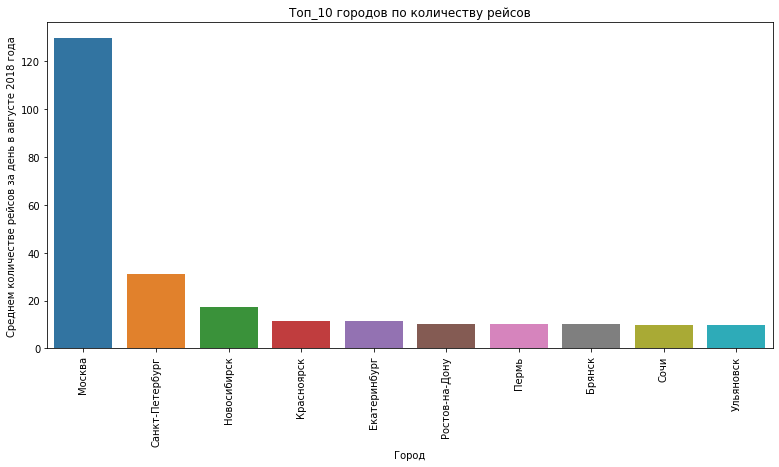

In [8]:
plt.figure(figsize=(13,6))
sns.barplot(x=city_top_10.index, y=city_top_10['average_flights'])
plt.xticks(rotation=90)
plt.title("Топ_10 городов по количеству рейсов")
plt.xlabel("Город")
plt.ylabel("Среднем количестве рейсов за день в августе 2018 года");

In [9]:
df2.query('city != "Москва"').describe()

,average_flights
count,100.000000
mean,4.251389
std,4.036344
min,1.000000
25%,2.000000
50%,3.000000
75%,5.483871
max,31.161290


**Вывод**

Из полученных данных видно, что больше всего количество рейсов прибывает в Москву (в среденм приходится около 130 рейсов в день). Затем идет Санкт-Петербург.


In [10]:
city_top_10.query('city != "Москва" and city != "Санкт-Петербург"').describe()

,average_flights
count,8.000000
mean,11.217742
std,2.574171
min,9.580645
25%,9.903226
50%,10.161290
75%,11.387097
max,17.322581


Среднее количество рейсов из топ-10 (за исключением Москвы и Санкт-Петербурга) городов составляет 11 рейсов за день.

### Рассмотреть модели самолетов и количество рейсов 

In [10]:
model = (df1.sort_values(by='flights_amount', ascending=False)
         .reset_index(drop = True))
model

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


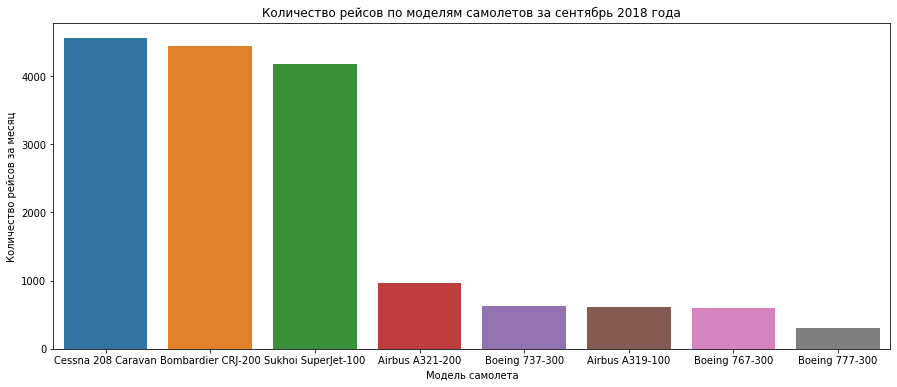

In [11]:
plt.figure(figsize=(15,6))
sns.barplot(x=model['model'], y=model['flights_amount'])
plt.title("Количество рейсов по моделям самолетов за сентябрь 2018 года")
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов за месяц");

**Вывод** 

По данным можно сделать вывод, что самыми популярными моделями самолетов являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Полученные результаты обусловленны тем, что первые три модели предусматривают меньшее размещение пассажиров, чем модели Airbus и Boeng: Cessna 208B Grand Caravan, рассчитанную на перевозку девяти пассажиров и приспособленную для работы в сложных условиях, Bombardier CRJ-200 расчитан на перевозку пятидесяти пассажиров на расстояние до 3000 км, Sukhoi SuperJet-100 предназначен для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.

### Рассмотреть города в и количество рейсов 

Ранее были рассмотренны топ-10 городов по среднему количеству рейсов за день, а теперь представим график среднего количества рейсов по всем городам.

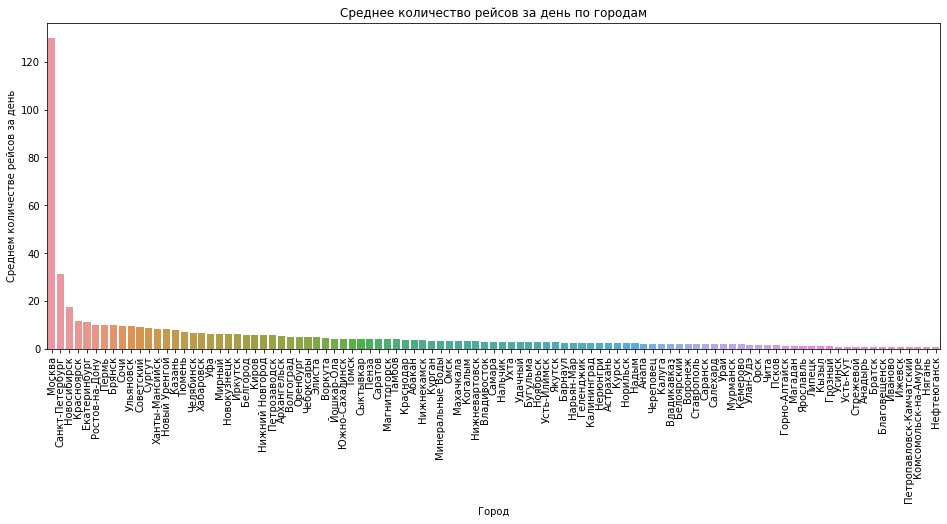

In [12]:
city = (df2.pivot_table(index = 'city', values = 'average_flights')
                     .sort_values(by='average_flights', ascending=False))
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
sns.barplot(x=city.index, y=city['average_flights'])
plt.title("Среднее количество рейсов за день по городам")
plt.xlabel("Город")
plt.ylabel("Среднем количестве рейсов за день");

Рассмотрим диаграмму размаха по всем городам.

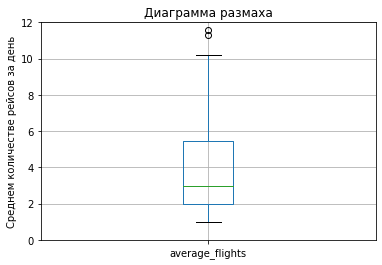

In [13]:
df2.query('city != "Москва" ')[['average_flights']].boxplot()
plt.ylim(0, 12)
plt.ylabel('Среднем количестве рейсов за день')
plt.title('Диаграмма размаха')
plt.show()

In [14]:
df2.query('city != "Москва" ').describe()

,average_flights
count,100.000000
mean,4.251389
std,4.036344
min,1.000000
25%,2.000000
50%,3.000000
75%,5.483871
max,31.161290


**Вывод**

Из полученных данных можно сделать вывод что на каждый город в среднем приходится по 4 рейса прибытия. Из графика наглядно видно какие города пользуются популярностью у пользователей, а какие нет.

## Общие выводы
* Изначально мы выгрузили ранее полученные данные и подготовили их к работе: проверили на пропуски,на отсутствие дубликатов, тип данных на корректность.
* Проведя анализ данных мы выбрали и отобразили графически топ-10 городов по количеству рейсов за день. Из полученных данных выяснили, что самым популярным городом является Москва (около 130 прилетевших рейсов), что не удевительно - столица. За ней следовала "вторая столица" - Санкт-Петербург.
* Был построен график количества рейсов по моделям самолетов за сентябрь 2018 года.Самыми популярными моделями самолетов стали Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Данные результаты обусловлены тем, что первые три модели предусматривают меньшее размещение пассажиров, чем модели Airbus и Boeng.
* Был построен график среднего количества рейсов за день по городам. Из графика наглядно видно какие города пользуются популярностью у пользователей, а какие нет. Левую часть составляют города миллионики.
* По итогам можем сделать вывод, что существует огромный спрос пассажиров на рейсы в Москву, а так же по получченным данным можно утвержать что пассажиры предпочитают такие модели самолетов, как Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, но это обусловлено тем, что аполняемость самолета меньше, а следовательно самолетов пускают больше.